In [1]:

# module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [13]:
data = pd.read_csv("C:/Users/charl/Downloads/heart+disease_1/reprocessed.hungarian.data", header=None)
data = data[0].str.split(expand=True)

In [14]:
data.head

<bound method NDFrame.head of      0  1  2    3    4  5  6    7   8    9   10  11  12 13
0    40  1  2  140  289  0  0  172   0    0  -9  -9  -9  0
1    49  0  3  160  180  0  0  156   0    1   2  -9  -9  1
2    37  1  2  130  283  0  1   98   0    0  -9  -9  -9  0
3    48  0  4  138  214  0  0  108   1  1.5   2  -9  -9  3
4    54  1  3  150   -9  0  0  122   0    0  -9  -9  -9  0
..   .. .. ..  ...  ... .. ..  ...  ..  ...  ..  ..  .. ..
289  48  0  2   -9  308  0  1   -9  -9    2   1  -9  -9  0
290  36  1  2  120  166  0  0  180   0    0  -9  -9  -9  0
291  48  1  3  110  211  0  0  138   0    0  -9  -9   6  0
292  47  0  2  140  257  0  0  135   0    1   1  -9  -9  0
293  53  1  4  130  182  0  0  148   0    0  -9  -9  -9  0

[294 rows x 14 columns]>

In [16]:
new_column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
data.columns = new_column_names
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,2,140,289,0,0,172,0,0,-9,-9,-9,0
1,49,0,3,160,180,0,0,156,0,1,2,-9,-9,1
2,37,1,2,130,283,0,1,98,0,0,-9,-9,-9,0
3,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,0,0,122,0,0,-9,-9,-9,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       294 non-null    object
 1   sex       294 non-null    object
 2   cp        294 non-null    object
 3   trestbps  294 non-null    object
 4   chol      294 non-null    object
 5   fbs       294 non-null    object
 6   restecg   294 non-null    object
 7   thalach   294 non-null    object
 8   exang     294 non-null    object
 9   oldpeak   294 non-null    object
 10  slope     294 non-null    object
 11  ca        294 non-null    object
 12  thal      294 non-null    object
 13  target    294 non-null    object
dtypes: object(14)
memory usage: 32.3+ KB


In [137]:
# data 타입 변환
data.loc[:, data.columns != 'oldpeak'] = data.loc[:, data.columns != 'oldpeak'].astype('int64')

print(data.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [37]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [39]:

!pip install sweetviz
import sweetviz

                                             |          | [  0%]   00:00 -> (? left)


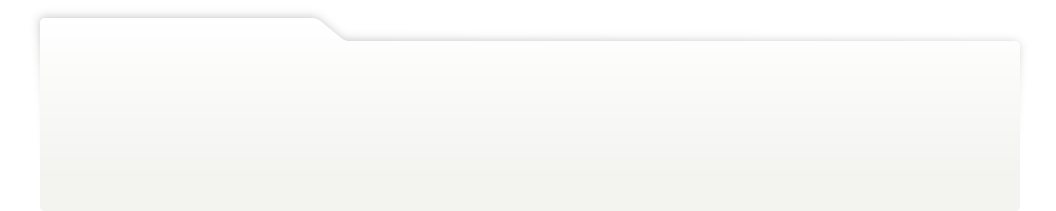
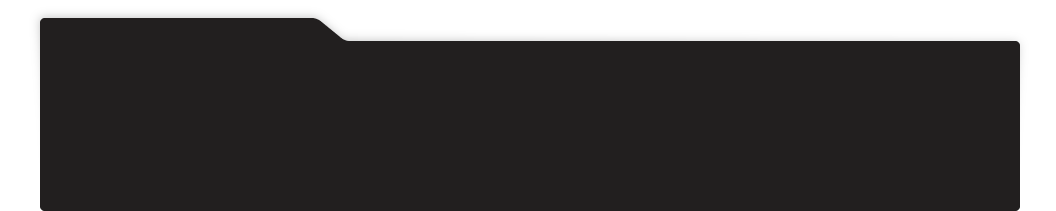
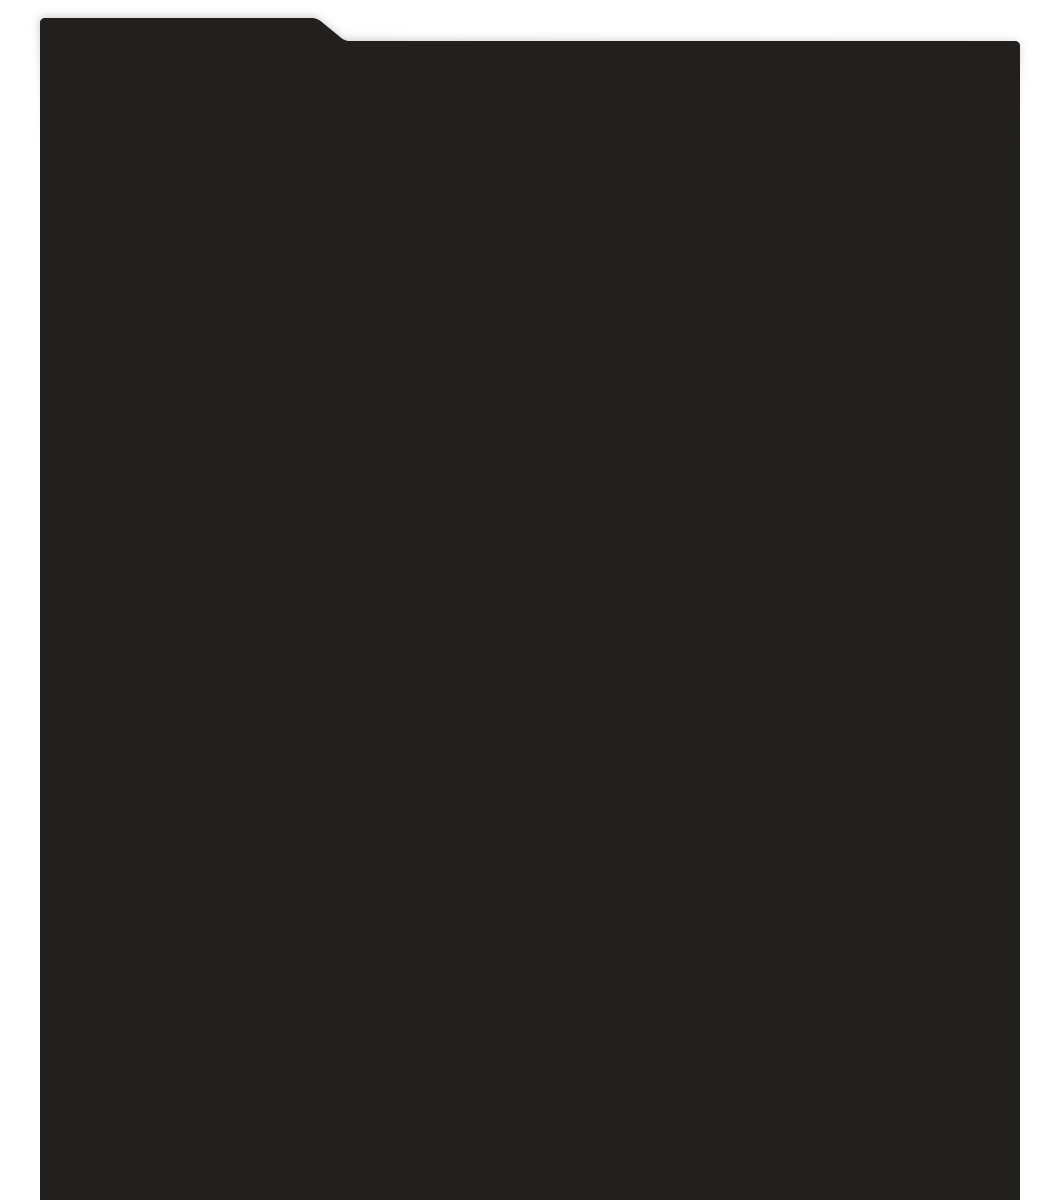
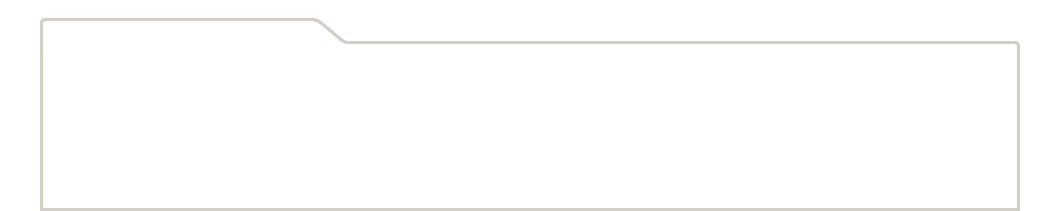
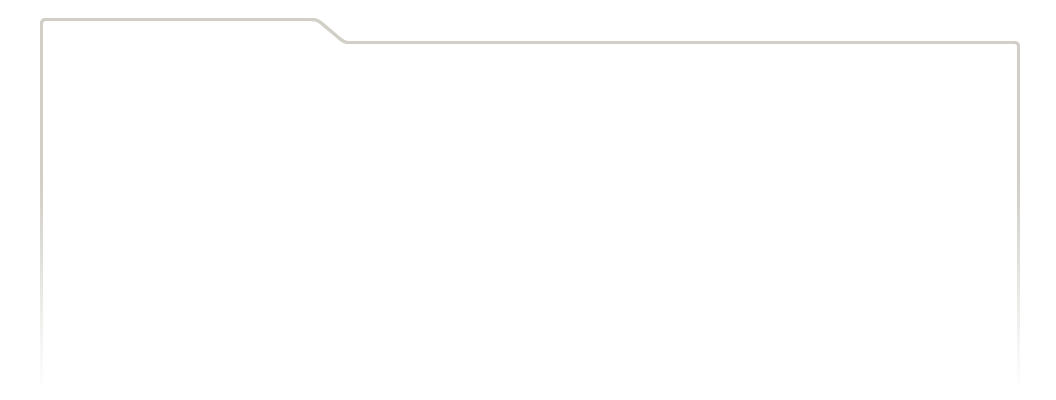
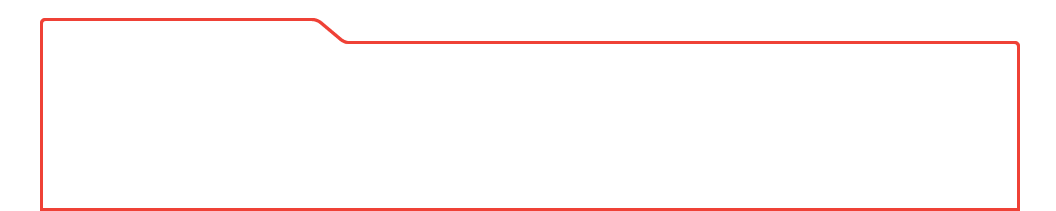
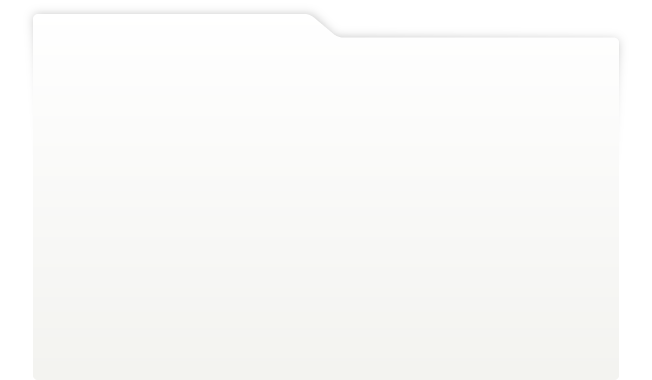
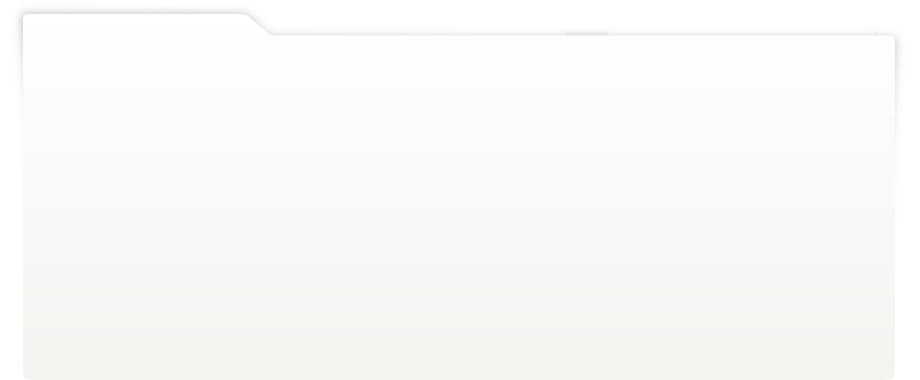
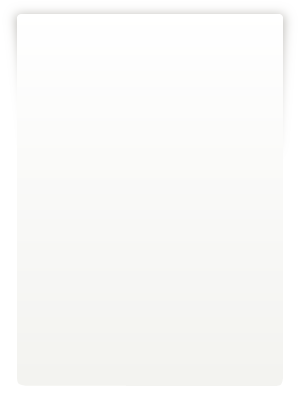
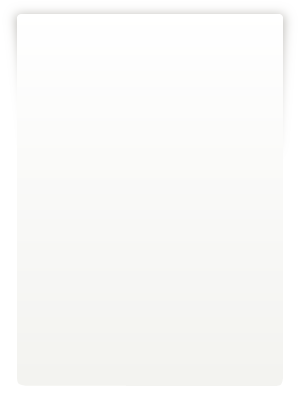
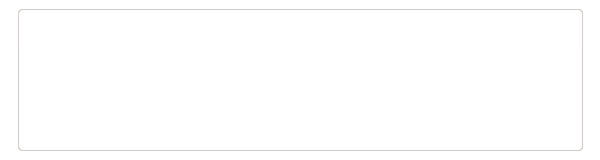
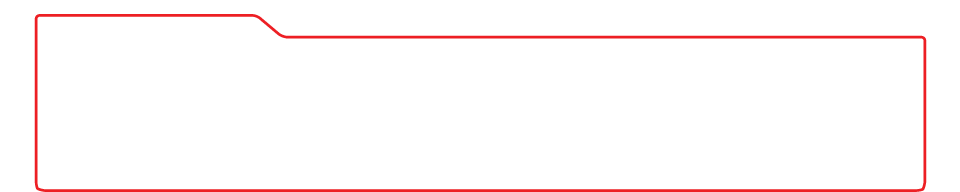
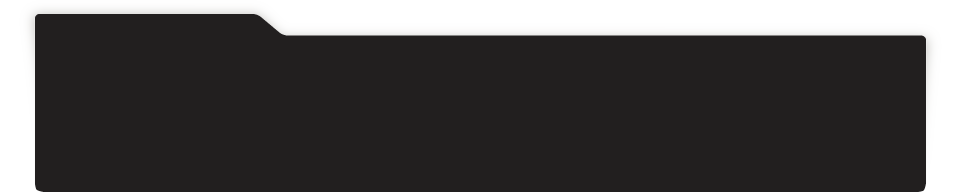
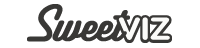
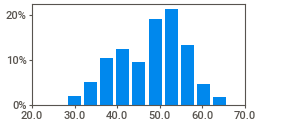
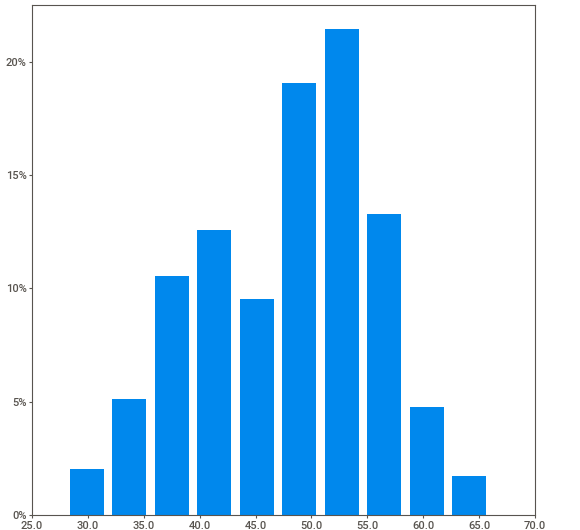
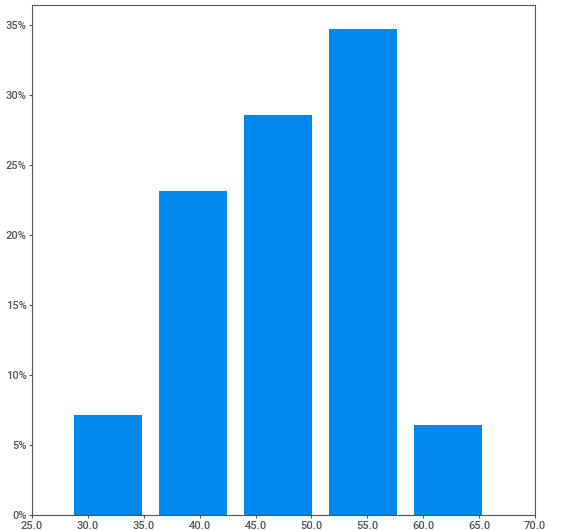
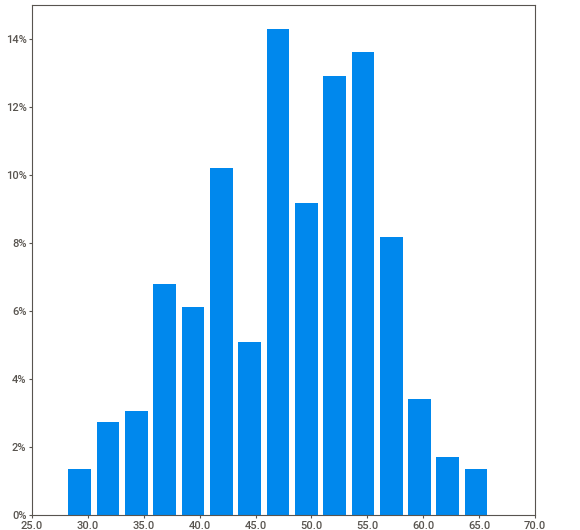
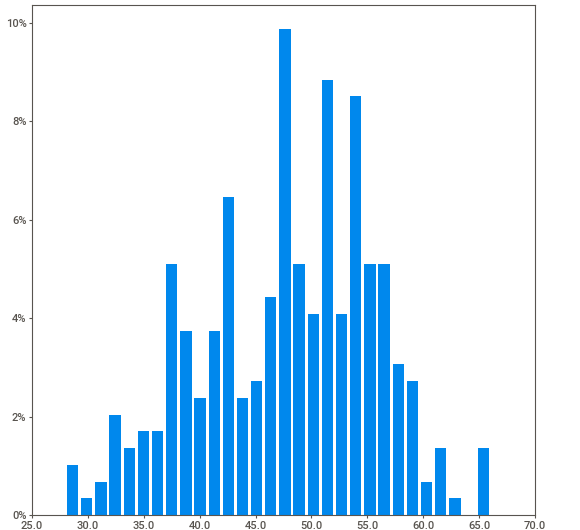
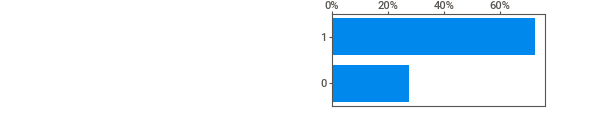
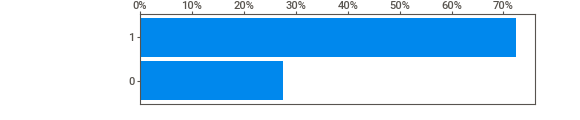
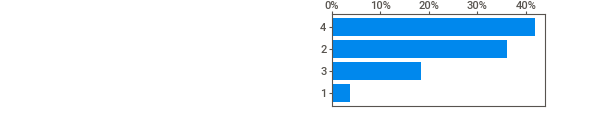
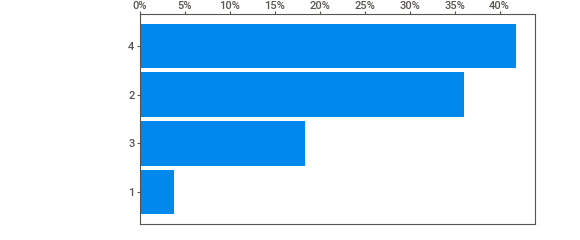
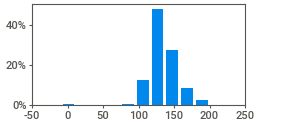
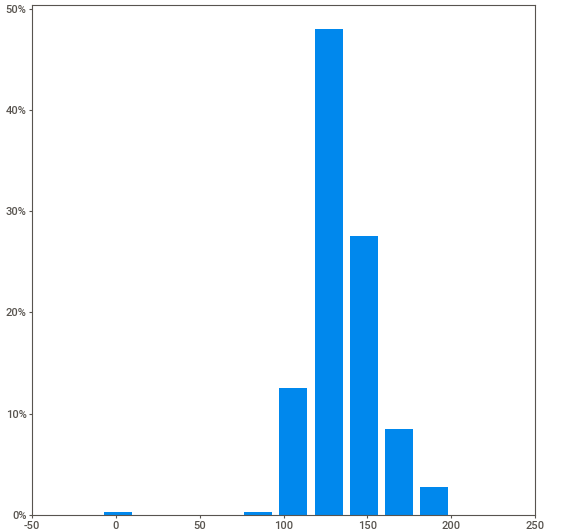
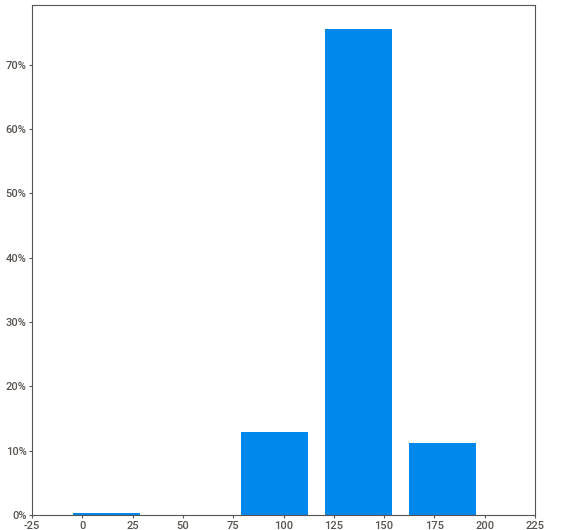
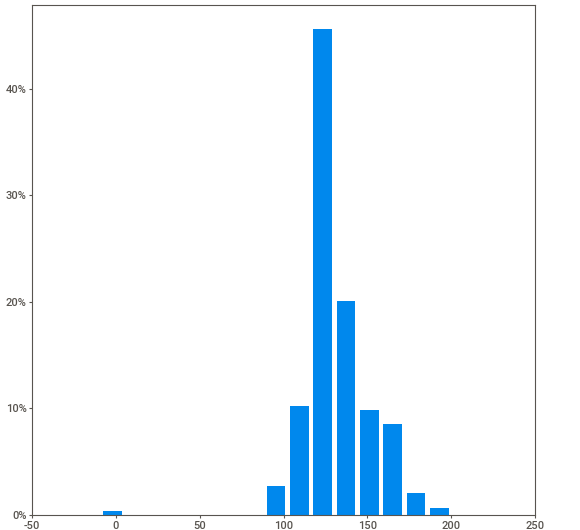
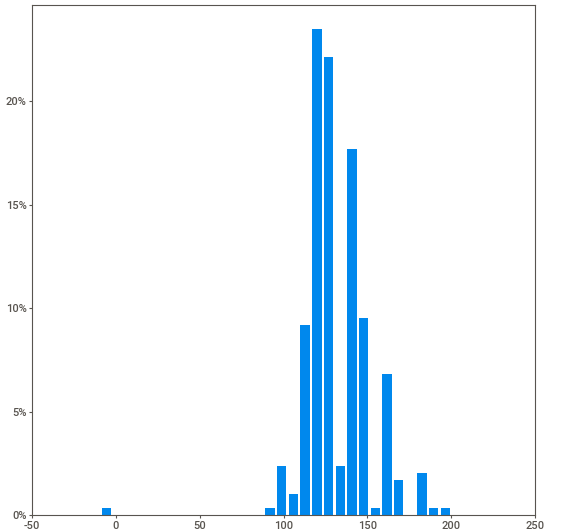
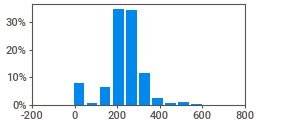
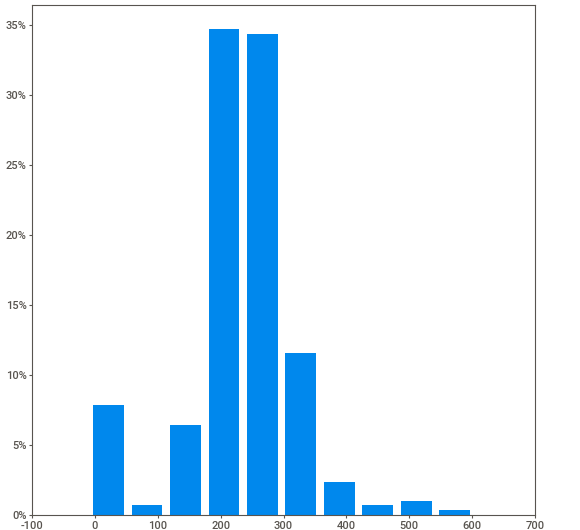
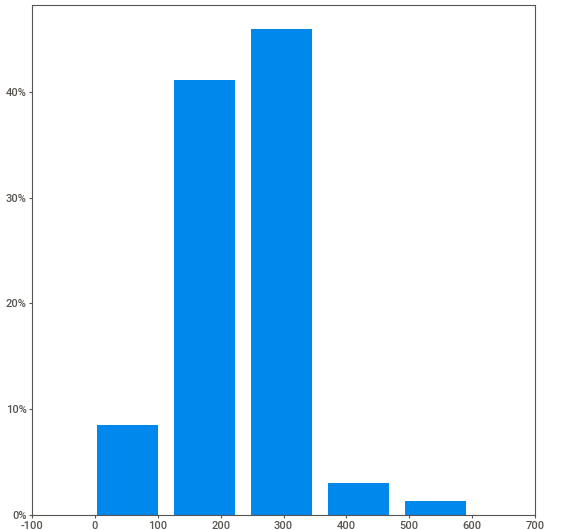
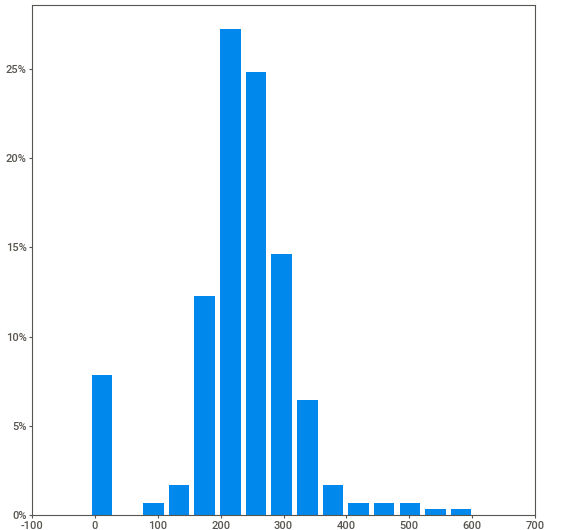
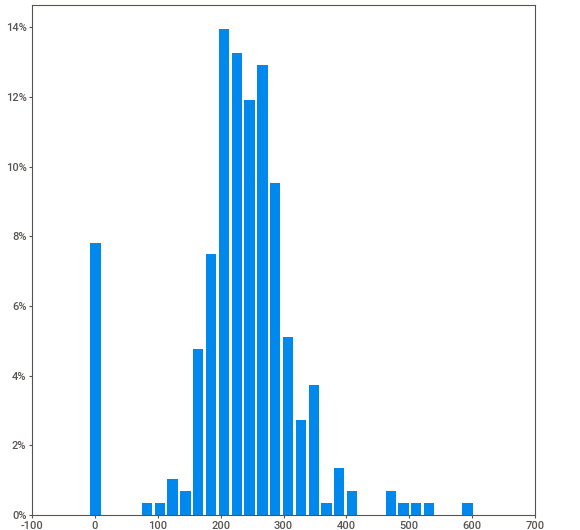
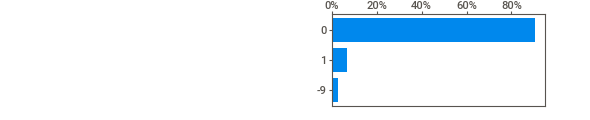
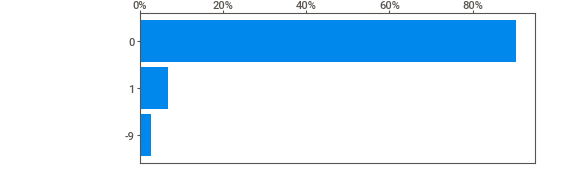
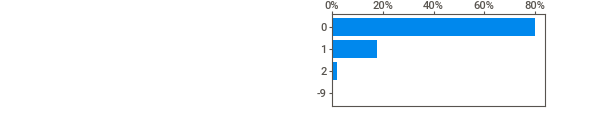
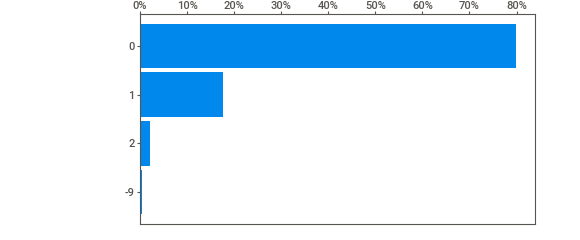
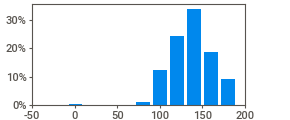
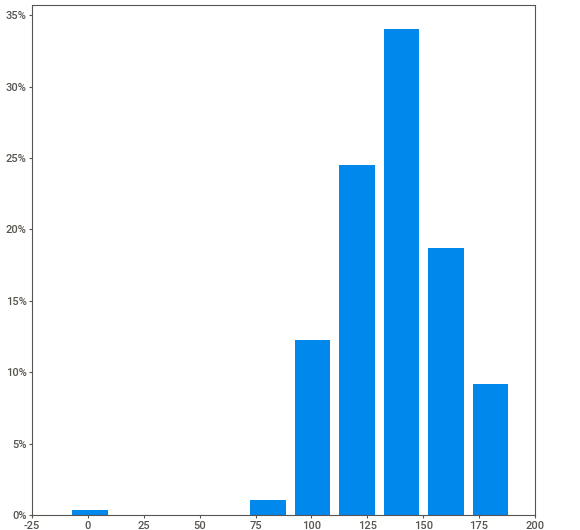
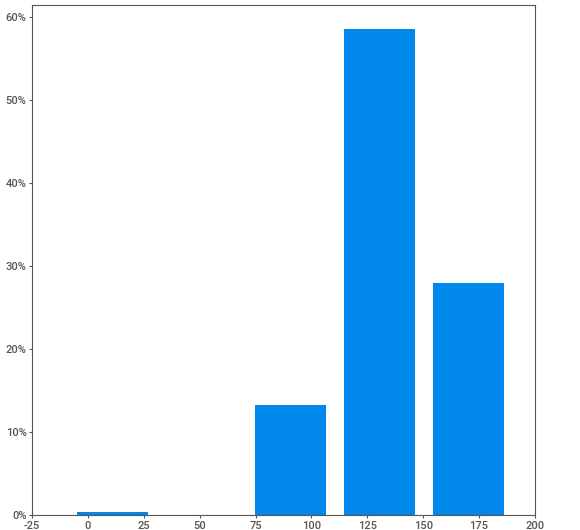
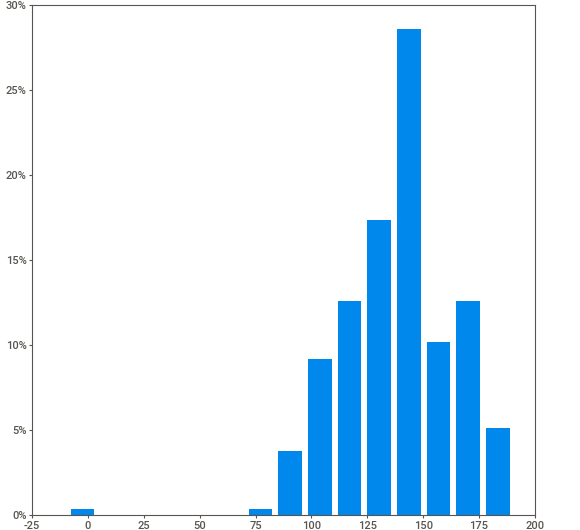
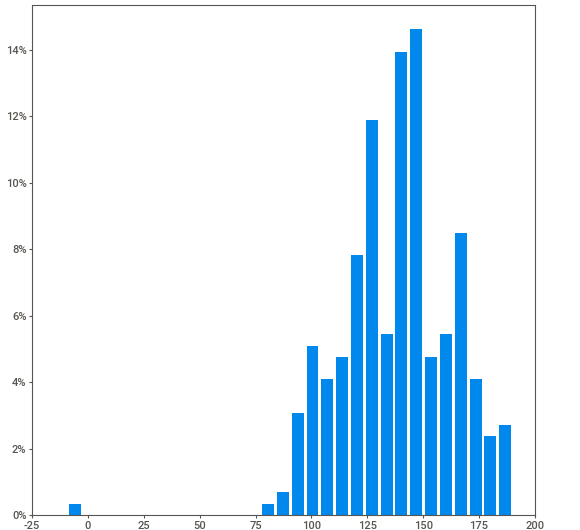
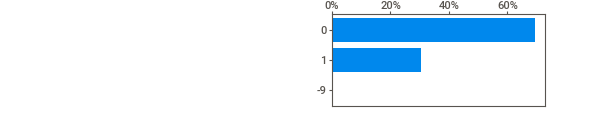
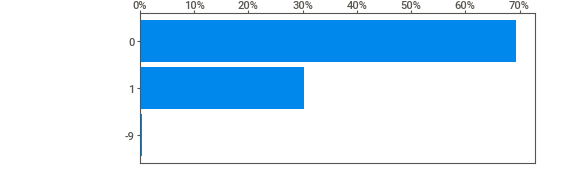
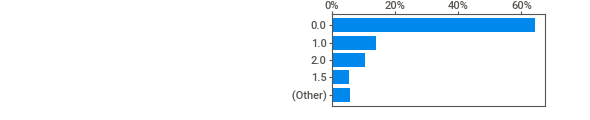
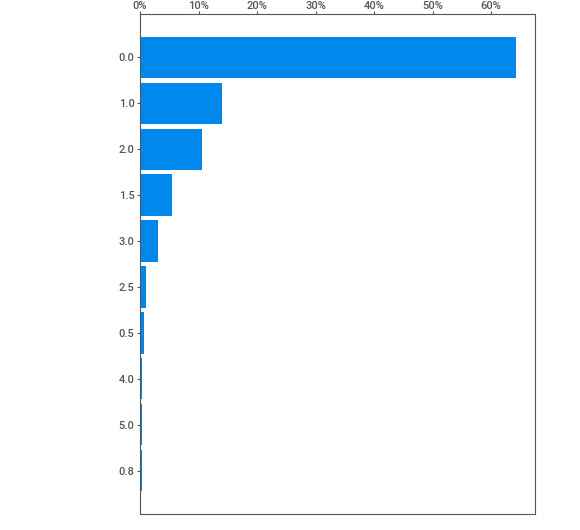
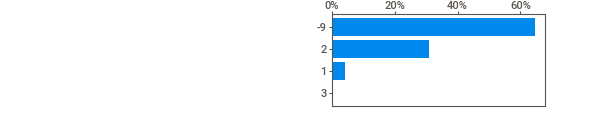
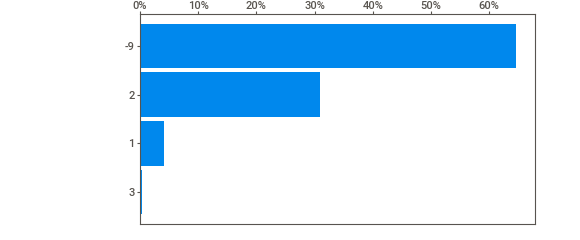
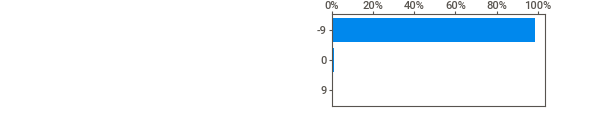
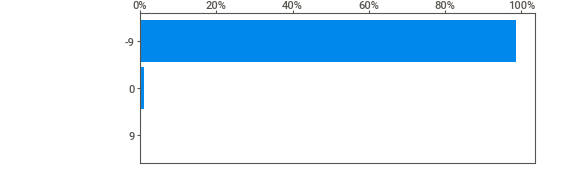
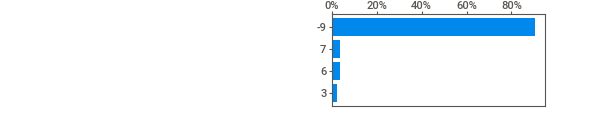
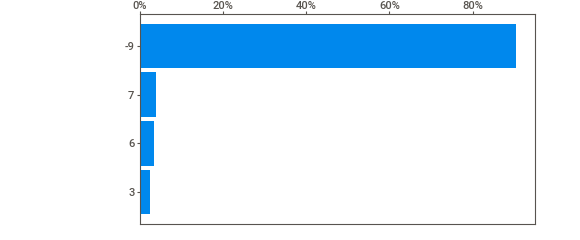
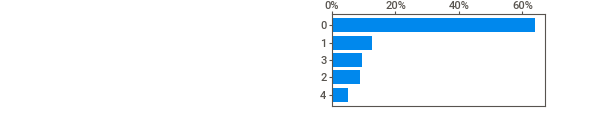
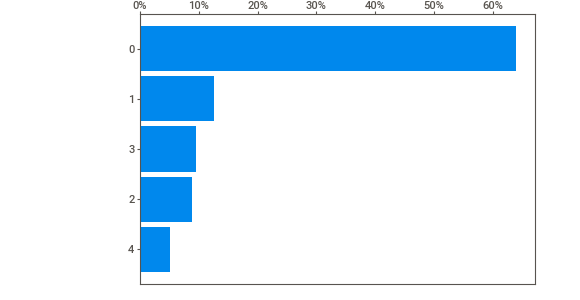
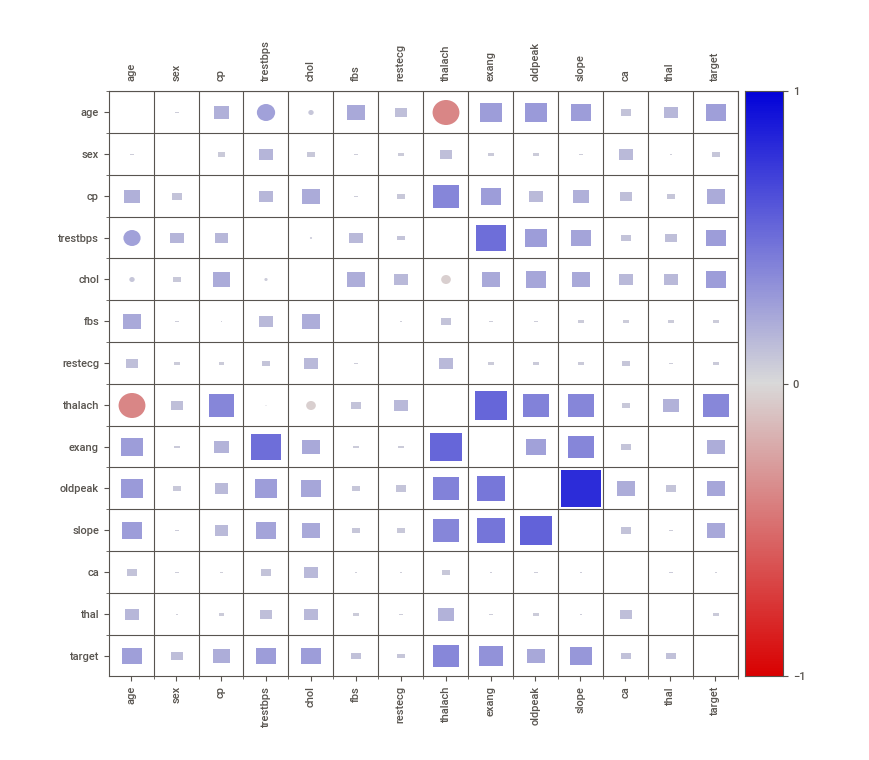
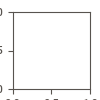

In [40]:
sweetviz.analyze(data).show_notebook()

In [41]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [42]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((235, 13), (59, 13), (235,), (59,))

In [45]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [46]:

# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)

(231, 5, 13) (231,)
(55, 5, 13) (55,)


In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((231, 5, 13), (55, 5, 13), (231,), (55,))

In [48]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense

In [50]:

y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [52]:

n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]
print(n_timesteps, n_features, n_outputs)

5 13 5


In [57]:
#CNN-LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dropout, MaxPooling1D, LSTM, Dense


In [145]:
# define model
#CNN-LSTM 
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=1))

model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_39 (Conv1D)          (None, 3, 32)             1280      
                                                                 
 dropout_43 (Dropout)        (None, 3, 32)             0         
                                                                 
 conv1d_40 (Conv1D)          (None, 1, 32)             3104      
                                                                 
 dropout_44 (Dropout)        (None, 1, 32)             0         
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 1, 32)            0         
 g1D)                                                            
                                                                 
 lstm_32 (LSTM)              (None, 100)               53200     
                                                     

In [146]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.1)

Epoch 1/30
7/7 [==============================] - 3s 71ms/step - loss: 1.5892 - accuracy: 0.2947 - val_loss: 1.5687 - val_accuracy: 0.5417
Epoch 2/30
7/7 [==============================] - 0s 12ms/step - loss: 1.4992 - accuracy: 0.6039 - val_loss: 1.5184 - val_accuracy: 0.5417
Epoch 3/30
7/7 [==============================] - 0s 11ms/step - loss: 1.4072 - accuracy: 0.6473 - val_loss: 1.4629 - val_accuracy: 0.5417
Epoch 4/30
7/7 [==============================] - 0s 11ms/step - loss: 1.3091 - accuracy: 0.6570 - val_loss: 1.4164 - val_accuracy: 0.5417
Epoch 5/30
7/7 [==============================] - 0s 12ms/step - loss: 1.2408 - accuracy: 0.6570 - val_loss: 1.4095 - val_accuracy: 0.5417
Epoch 6/30
7/7 [==============================] - 0s 11ms/step - loss: 1.1849 - accuracy: 0.6570 - val_loss: 1.4240 - val_accuracy: 0.5417
Epoch 7/30
7/7 [==============================] - 0s 11ms/step - loss: 1.1959 - accuracy: 0.6570 - val_loss: 1.4158 - val_accuracy: 0.5417
Epoch 8/30
7/7 [===========

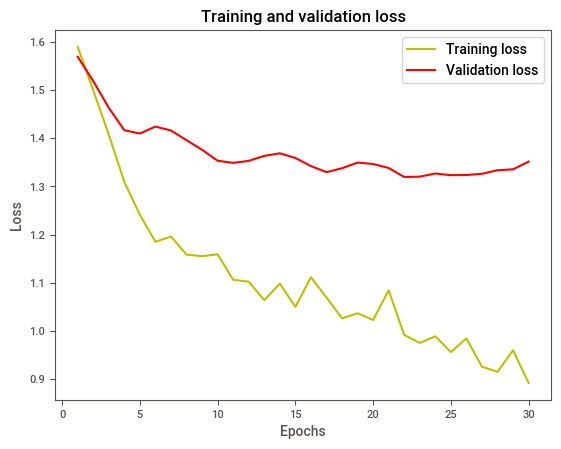

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

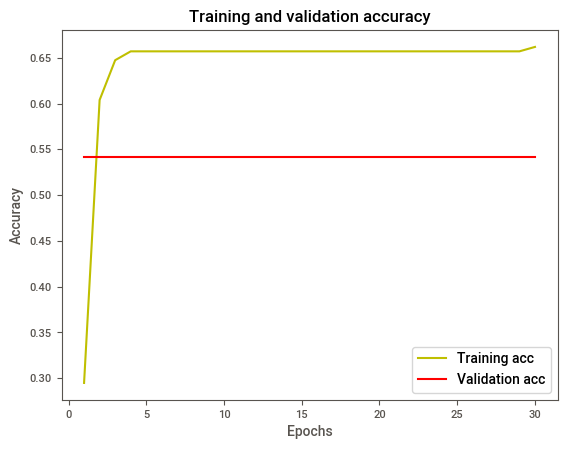

In [148]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [149]:

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

2/2 [==============================] - 0s 0s/step


In [150]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        33
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.60        55
   macro avg       0.12      0.20      0.15        55
weighted avg       0.36      0.60      0.45        55

[[33  0  0  0  0]
 [ 9  0  0  0  0]
 [ 6  0  0  0  0]
 [ 5  0  0  0  0]
 [ 2  0  0  0  0]]


C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
